# Algorithm Sandbox

This file contains work done to try to formulate an effective algorithm. This is a sandbox-type file, meant to experiment. Meaningful insights/work will be exported and summarized in a separate location.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/TerryONeill/Terry_git/Capstone/GABBERT/wide_receivers/wrs_finalish.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [3]:
df.head()

,name,season,age,draft_pos,team,weight,bmi,games,rush_atts,rush_yds,...,rookie_season,height_inches,start_ratio,dpis_drawn,dpi_yards,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,years_in_league
0,David Boston,1999.0,21.0,1-8,ARI,240.0,30.8,16.0,5.0,0.0,...,1999.0,74.0,0.500000,1.0,24.0,0.145161,0.139373,0.168748,0.181818,0.0
1,Rob Moore,1999.0,31.0,1-1,ARI,203.0,25.4,14.0,0.0,0.0,...,1999.0,75.0,0.714286,6.0,88.0,0.172043,0.128920,0.221548,0.454545,0.0
2,Frank Sanders,1999.0,26.0,2-47,ARI,215.0,27.6,16.0,0.0,0.0,...,1999.0,74.0,1.000000,1.0,4.0,0.274194,0.275261,0.340350,0.090909,0.0
3,Mac Cody,1999.0,27.0,UDFA,ARI,182.0,25.4,13.0,0.0,0.0,...,1999.0,71.0,0.000000,1.0,20.0,0.019713,0.020906,0.021406,0.090909,0.0
4,Mac Cody,2000.0,28.0,UDFA,ARI,182.0,25.4,15.0,0.0,0.0,...,1999.0,71.0,0.066667,0.0,0.0,0.048736,0.053797,0.065231,0.000000,1.0


In [4]:
eval_df = df.set_index('name')


In [5]:
eval_df = eval_df.T
eval_df.head()

name,David Boston,Rob Moore,Frank Sanders,Mac Cody,Mac Cody,Frank Sanders,Frank Sanders,Arnold Jackson,MarTay Jenkins,Frank Sanders,...,Brandon Banks,Niles Paul,Roy Helu,Leonard Hankerson,Logan Paulsen,Niles Paul,Quinton Dunbar,Rashad Ross,Jordan Reed,Derek Carrier
season,1999,1999,1999,1999,2000,2000,2001,2001,2001,2002,...,2012,2013,2014,2014,2014,2014,2015,2015,2015,2015
age,21,31,26,27,28,27,28,24,26,29,...,25,24,26,25,27,25,23,25,25,25
draft_pos,1-8,1-1,2-47,UDFA,UDFA,2-47,2-47,UDFA,6-193,2-47,...,UDFA,5-155,4-105,3-79,UDFA,5-155,UDFA,UDFA,3-85,UDFA
team,ARI,ARI,ARI,ARI,ARI,ARI,ARI,ARI,ARI,ARI,...,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS,WAS
weight,240,203,215,182,182,215,215,168,201,215,...,150,225,216,205,264,225,201,167,236,238


In [49]:
df[df.height_inches.isnull() == True]

,name,season,age,draft_pos,team,weight,bmi,games,rush_atts,rush_yds,...,rookie_season,height_inches,start_ratio,dpis_drawn,dpi_yards,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,years_in_league
590,Kris Durham,2013.0,25.0,4-107,DET,214.0,NaN,16.0,0.0,0.0,...,2011.0,NaN,0.812500,1.0,21.0,0.134069,0.102426,0.109326,0.068966,2.0
1505,Kris Durham,2014.0,26.0,4-107,TEN,214.0,NaN,4.0,0.0,0.0,...,2011.0,NaN,0.000000,0.0,0.0,0.021442,0.020067,0.015826,0.000000,3.0
1585,John Brown,2015.0,25.0,3-91,ARI,179.0,NaN,15.0,3.0,22.0,...,2015.0,NaN,0.733333,5.0,136.0,0.156832,0.162095,0.193966,0.179487,0.0
2320,Kris Durham,2012.0,24.0,4-107,DET,214.0,NaN,4.0,0.0,0.0,...,2011.0,NaN,0.750000,0.0,0.0,0.028378,0.017978,0.025370,0.045455,1.0
3032,Kris Durham,2011.0,23.0,4-107,SEA,214.0,NaN,3.0,0.0,0.0,...,2011.0,NaN,0.000000,0.0,0.0,0.007859,0.010033,0.009662,0.000000,0.0


In [6]:
df.isnull().sum()

name                        0
season                      0
age                         8
draft_pos                   0
team                        0
weight                      0
bmi                         5
games                       0
rush_atts                   0
rush_yds                    0
rush_y/a                    0
rush_tds                    0
rush_ypg                    0
targets                     0
receptions                  0
rec_yards                   0
yards/reception             0
rec_tds                     0
rec_ypg                     0
ctch_pct                    0
y/tgt                       0
fumbles                     0
fumbles_recovered           0
fum_ret_yds                 0
fum_tds                     0
forced_fumbles              0
pro_bowls                   0
all_pros                    0
position                    0
100yd_gms                   0
                         ... 
recs_ovr_25                 0
drops                       0
EYds      

In [7]:
np.average(df['rush_y/a'])

2.2380756225023055

In [8]:
print df.columns

Index([u'name', u'season', u'age', u'draft_pos', u'team', u'weight', u'bmi',
       u'games', u'rush_atts', u'rush_yds', u'rush_y/a', u'rush_tds',
       u'rush_ypg', u'targets', u'receptions', u'rec_yards',
       u'yards/reception', u'rec_tds', u'rec_ypg', u'ctch_pct', u'y/tgt',
       u'fumbles', u'fumbles_recovered', u'fum_ret_yds', u'fum_tds',
       u'forced_fumbles', u'pro_bowls', u'all_pros', u'position', u'100yd_gms',
       u'yac', u'first_down_ctchs', u'first_down_ctchpct', u'long_ctch',
       u'recs_ovr_25', u'drops', u'EYds', u'DVOA', u'DYAR', u'position.1',
       u'Hand Size in', u'Arm Length in', u'40 Yard', u'Vert Leap in',
       u'Broad Jump in', u'Shuttle', u'3Cone', u'60Yd Shuttle',
       u'team_pass_tds', u'team_pass_yds', u'team_pass_attempts',
       u'team_completions', u'total_points', u'rookie_age', u'rookie_season',
       u'height_inches', u'start_ratio', u'dpis_drawn', u'dpi_yards',
       u'pct_team_tgts', u'pct_team_receptions', u'pct_of_team_passyards

In [9]:
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler

data = df[df.season == 2015]

cols = ['name', 'rec_tds', 'rush_yds', 'rec_yards', 'DVOA', 'DYAR', 'yac', 'yards/reception',
       'ctch_pct', 'targets', 'drops', 'start_ratio', 'first_down_ctchs', 'recs_ovr_25',
       'receptions', 'y/tgt', 'EYds', 'dpis_drawn', 'dpi_yards', 'pct_team_tgts',
       'pct_team_receptions', 'pct_of_team_passyards', 'pct_team_touchdowns']

scale_cols = ['rec_tds', 'rush_yds', 'rec_yards', 'DVOA', 'DYAR', 'yac', 'yards/reception',
       'ctch_pct', 'targets', 'drops', 'start_ratio', 'first_down_ctchs', 'recs_ovr_25',
       'receptions', 'y/tgt', 'EYds', 'dpis_drawn', 'dpi_yards', 'pct_team_tgts',
       'pct_team_receptions', 'pct_of_team_passyards', 'pct_team_touchdowns']

sca = StandardScaler()
minmax = MinMaxScaler(feature_range = (1, 5), copy = False)

# for col in scale_cols:
#     data[col] = minmax.fit_transform(data[col])
#     #data[col] = data[col] + 1

In [10]:
data

,name,season,age,draft_pos,team,weight,bmi,games,rush_atts,rush_yds,...,rookie_season,height_inches,start_ratio,dpis_drawn,dpi_yards,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,years_in_league
55,Jaron Brown,2015.0,25.0,UDFA,ARI,205.0,26.3,16.0,0.0,0.0,...,2013.0,74.0,0.000000,1.0,32.0,0.035714,0.027431,0.027848,0.025641,2.0
56,Michael Floyd,2015.0,26.0,1-13,ARI,220.0,27.5,15.0,0.0,0.0,...,2012.0,75.0,0.400000,2.0,40.0,0.138199,0.129676,0.164185,0.153846,3.0
111,Roddy White,2015.0,34.0,1-27,ATL,201.0,26.5,16.0,0.0,0.0,...,2005.0,73.0,1.000000,1.0,6.0,0.112721,0.104878,0.115472,0.047619,10.0
112,Justin Hardy,2015.0,24.0,4-107,ATL,190.0,26.5,9.0,0.0,0.0,...,2015.0,71.0,0.111111,0.0,0.0,0.057971,0.051220,0.044272,0.000000,0.0
167,Kamar Aiken,2015.0,26.0,UDFA,BAL,213.0,27.3,16.0,0.0,0.0,...,2011.0,74.0,0.875000,2.0,32.0,0.187870,0.176056,0.221026,0.238095,4.0
168,Steve Smith,2015.0,36.0,3-74,BAL,185.0,27.3,7.0,0.0,0.0,...,2001.0,69.0,1.000000,0.0,0.0,0.107988,0.107981,0.156872,0.142857,14.0
169,Steve Smith,2015.0,36.0,3-74,BAL,185.0,27.3,7.0,0.0,0.0,...,2001.0,69.0,1.000000,0.0,0.0,0.107988,0.107981,0.156872,0.142857,14.0
170,Marlon Brown,2015.0,24.0,UDFA,BAL,216.0,25.6,10.0,0.0,0.0,...,2014.0,77.0,0.200000,0.0,0.0,0.044379,0.032864,0.026223,0.000000,1.0
222,Robert Woods,2015.0,23.0,2-41,BUF,201.0,26.5,14.0,1.0,0.0,...,2013.0,73.0,0.642857,0.0,0.0,0.172043,0.159322,0.165121,0.130435,2.0
223,Chris Hogan,2015.0,27.0,UDFA,BUF,220.0,29.0,16.0,1.0,4.0,...,2013.0,73.0,0.250000,0.0,0.0,0.126882,0.122034,0.134610,0.086957,2.0


In [11]:
### finding averages for the 2015 season

## average touchdowns per player
print np.average(data.rec_tds)

2.40552995392


In [12]:
## average total yards (receiving plus rushing) per player
print np.average(data.rush_yds + data.rec_yards)

392.539170507


In [13]:
print np.average(data.rec_yards)

378.456221198


In [14]:
## average DVOA per player

print np.average(data.DVOA)

0.0572138154679


In [15]:
## average DYAR per player
print np.average(data.DYAR)

0.869404209288


In [16]:
## average YAC per player
print np.average(data.yac)

18.2903225806


In [17]:
## average yards per reception (yards/catch) per player
print np.average(data['yards/reception'])

11.4913824885


In [18]:
## average catch rate per player
print np.average(data.ctch_pct)

0.547396313364


In [19]:
## average targets per player
print np.average(data.targets)

48.5898617512


In [20]:
## average number of drops per player
print np.average(data.drops)

0.354838709677


In [21]:
## average start ratio per player
print np.average(data.start_ratio)

0.400698264869


In [22]:
## average number of catches for first down per player
print np.average(data.first_down_ctchs)

2.8801843318


In [23]:
## average receptions over 25 yards per player
print np.average(data.recs_ovr_25)

0.612903225806


In [24]:
## average total receptions on the season per player
print np.average(data.receptions)

29.3548387097


In [25]:
## average yards per target per player
print np.average(data['y/tgt'])

6.8699078341


In [26]:
## average Expected yards per player
print np.average(data.EYds)

### This needs to be further examined as some of these values are way too big

192.89121732


In [27]:
## average defensive PI drawn per player
print np.average(data.dpis_drawn)

0.649769585253


In [28]:
## average yards from DPI drawn per player
print np.average(data.dpi_yards)

12.4884792627


In [29]:
## average percentage of team targets per player
print np.average(data.pct_team_tgts)

0.0814529686512


In [30]:
## average percentage of team receptions per player
print np.average(data.pct_team_receptions)

0.0785649959152


In [31]:
## average percentage of team passing yards per player
print np.average(data.pct_of_team_passyards)

0.0937397037718


In [32]:
## average percentage of team touchdowns per player
print np.average(data.pct_team_touchdowns)

0.0894154315498


In [44]:
data['PAR'] = (data.rec_tds/np.average(data.rec_tds) + 
              (data.rush_yds + data.rec_yards)/np.average(data.rush_yds + data.rec_yards)+
              data.DVOA/np.average(data.DVOA) +
              data.DYAR/np.average(data.DYAR)+
              data['yards/reception']/np.average(data['yards/reception'])+
              data.ctch_pct/np.average(data.ctch_pct) -
              data.drops/2+
              data.start_ratio/np.average(data.start_ratio)+
              data.first_down_ctchs/np.average(data.first_down_ctchs)+
              data.recs_ovr_25/np.average(data.recs_ovr_25)+
              data.receptions/np.average(data.receptions)+
              data['y/tgt']/np.average(data['y/tgt'])+
              data.dpis_drawn/np.average(data.dpis_drawn)+
              data.dpi_yards/np.average(data.dpi_yards)+
              data.pct_team_tgts/np.average(data.pct_team_tgts)+
              data.pct_team_receptions/np.average(data.pct_team_receptions)+
              data.pct_of_team_passyards/np.average(data.pct_of_team_passyards)+
              data.pct_team_touchdowns/np.average(data.pct_team_touchdowns))


import math

data['dropK'] = np.log(data['drops'] +1)
data['base'] = (((data.rec_yards+data.dpi_yards+(data.DYAR*100))*data.receptions)/(data.dropK + (data.targets/data.pct_team_tgts))**2)
data['td_points'] = ((data.rec_tds/np.average(data.rec_tds))*data.pct_team_touchdowns)
data['compilation'] = (data.base*100) + (data.td_points*7)

/Users/TerryONeill/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/TerryONeill/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/TerryONeill/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [46]:
data.sort('compilation', ascending = False)

/Users/TerryONeill/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,name,season,age,draft_pos,team,weight,bmi,games,rush_atts,rush_yds,...,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,years_in_league,PAR,dropK,base,td_points,compilation
1837,Antonio Brown,2015.0,27.0,6-195,PIT,180.0,25.8,16.0,3.0,28.0,...,0.291101,0.312644,0.358483,0.370370,5.0,71.250848,0.000000,0.788026,1.539662,89.580281
1595,Julio Jones,2015.0,26.0,1-6,ATL,220.0,26.8,16.0,0.0,0.0,...,0.326892,0.331707,0.426974,0.380952,4.0,50.807129,0.000000,0.801595,1.266922,89.027981
1813,Brandon Marshall,2015.0,31.0,4-119,NYJ,229.0,27.9,16.0,0.0,0.0,...,0.286424,0.301105,0.370224,0.424242,9.0,46.422923,0.000000,0.549458,2.469058,72.229190
2160,A.J. Green,2015.0,27.0,1-4,CIN,205.0,25.0,16.0,0.0,0.0,...,0.241758,0.240896,0.315495,0.312500,4.0,43.808563,0.000000,0.571278,1.299090,66.221448
2531,Allen Robinson,2015.0,22.0,2-61,JAX,220.0,27.5,16.0,0.0,0.0,...,0.248764,0.225352,0.340798,0.400000,1.0,95.892848,1.791759,0.442954,2.327969,60.591197
1723,DeAndre Hopkins,2015.0,23.0,1-27,HOU,214.0,28.2,16.0,0.0,0.0,...,0.294028,0.297587,0.385551,0.379310,2.0,98.556963,1.386294,0.483689,1.734509,60.510466
1805,Odell Beckham,2015.0,23.0,1-12,NYG,198.0,27.6,15.0,1.0,3.0,...,0.253612,0.244898,0.333563,0.361111,1.0,99.323947,1.791759,0.458156,1.951522,59.476267
2627,Jeremy Maclin,2015.0,27.0,1-19,KAN,200.0,27.1,15.0,3.0,14.0,...,0.227523,0.244382,0.296377,0.363636,5.0,40.853275,0.000000,0.477774,1.209335,56.242708
1844,Doug Baldwin,2015.0,27.0,UDFA,SEA,189.0,27.1,16.0,0.0,0.0,...,0.182948,0.206897,0.251885,0.368421,3.0,41.153113,0.000000,0.364938,2.144182,51.503066
1611,Sammy Watkins,2015.0,22.0,1-4,BUF,211.0,27.8,13.0,1.0,1.0,...,0.206452,0.203390,0.313192,0.391304,1.0,40.701097,0.000000,0.385709,1.464018,48.819059


In [35]:
np.average(data.compilation[data.compilation >= 0])

8.7306751349955896

In [36]:
data[data.name == "Sammy Watkins"]

,name,season,age,draft_pos,team,weight,bmi,games,rush_atts,rush_yds,...,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,years_in_league,PAR,dropK,base,td_points,compilation
1611,Sammy Watkins,2015.0,22.0,1-4,BUF,211.0,27.8,13.0,1.0,1.0,...,0.206452,0.20339,0.313192,0.391304,1.0,40.701097,0.0,0.299133,1.464018,40.161411


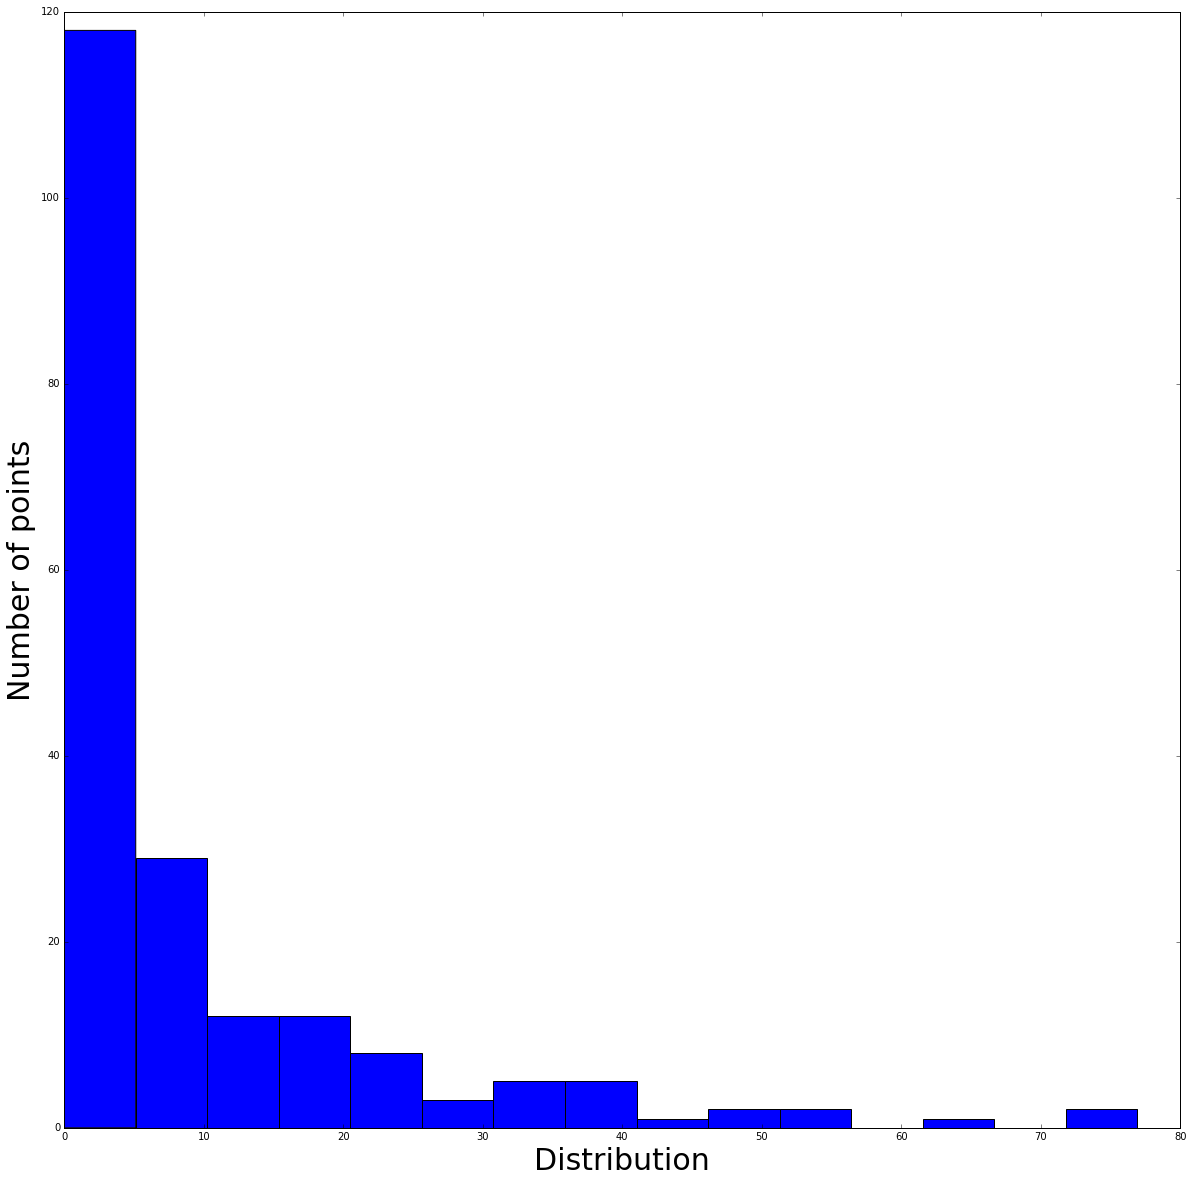

In [37]:
plt.rcParams.update({'axes.titlesize': 'medium'})

plt.figure(figsize = (20, 20))
plt.rcParams.update({'axes.titlesize': 'medium'})

plt.xlabel('Distribution', fontsize = 30)
plt.ylabel('Number of points', fontsize = 30)
plt.hist(data.compilation[data.compilation >= 0], bins = 15)
plt.show()

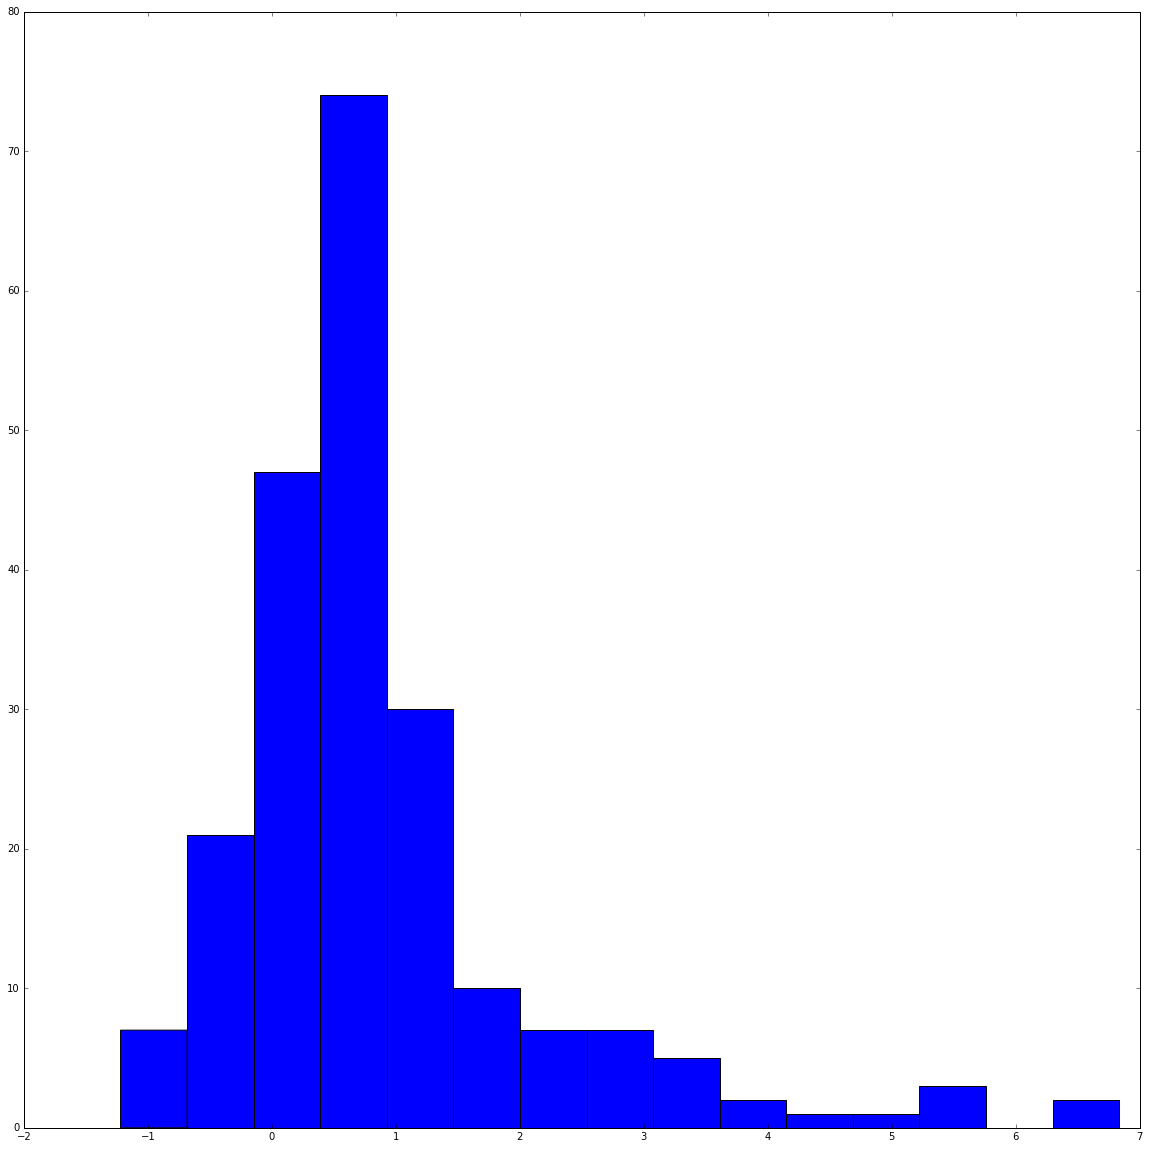

In [38]:
plt.figure(figsize = (20, 20))
plt.hist(data.DYAR, bins = 15)
plt.show()

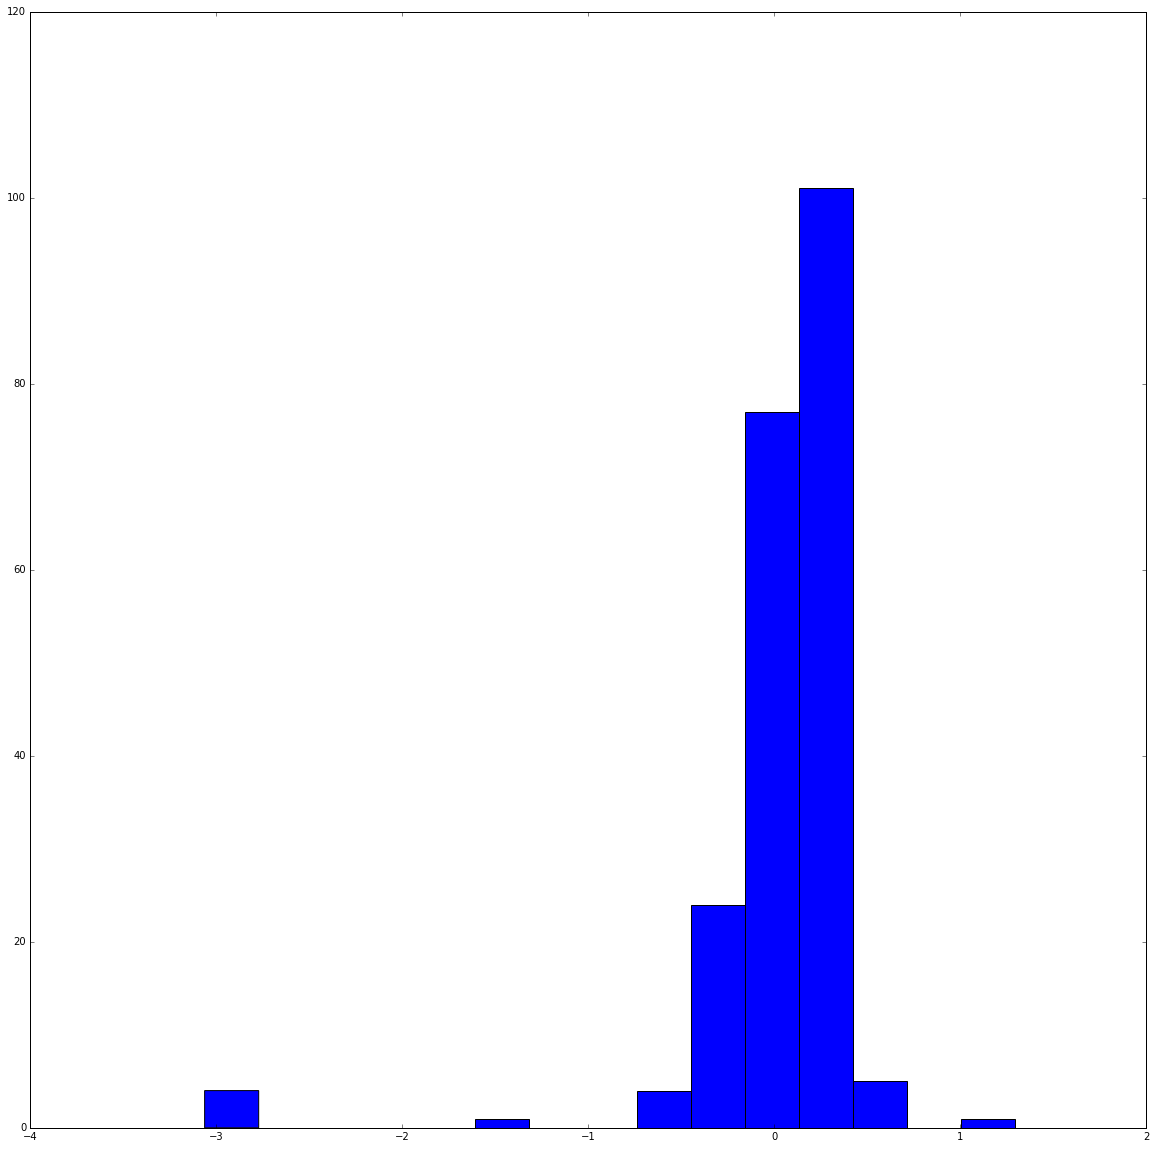

In [39]:
plt.figure(figsize = (20, 20))
plt.hist(data.DVOA, bins = 15)
plt.show()

In [42]:
dyar_cols = ['DVOA', 'DYAR', 'name']
dyar_df = pd.DataFrame(data[dyar_cols])
dyar_df.sort('DYAR', ascending = False)

/Users/TerryONeill/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,DVOA,DYAR,name
2160,0.356633,6.833159,A.J. Green
2531,0.356633,6.521367,Allen Robinson
3251,0.356633,5.702462,Jordan Reed
2529,0.356633,5.495302,Allen Hurns
2627,0.356633,5.431577,Jeremy Maclin
1837,0.197000,5.170000,Antonio Brown
2788,0.356633,4.561600,Willie Snead
1844,0.396000,4.140000,Doug Baldwin
1584,0.189000,3.630000,Larry Fitzgerald
1585,0.299000,3.520000,John Brown
